# Behavior of Linear Models

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])

> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different regularization strength [0.001, 1, 100]

## 8A_LR_SVM : Task 1: Applying SVM

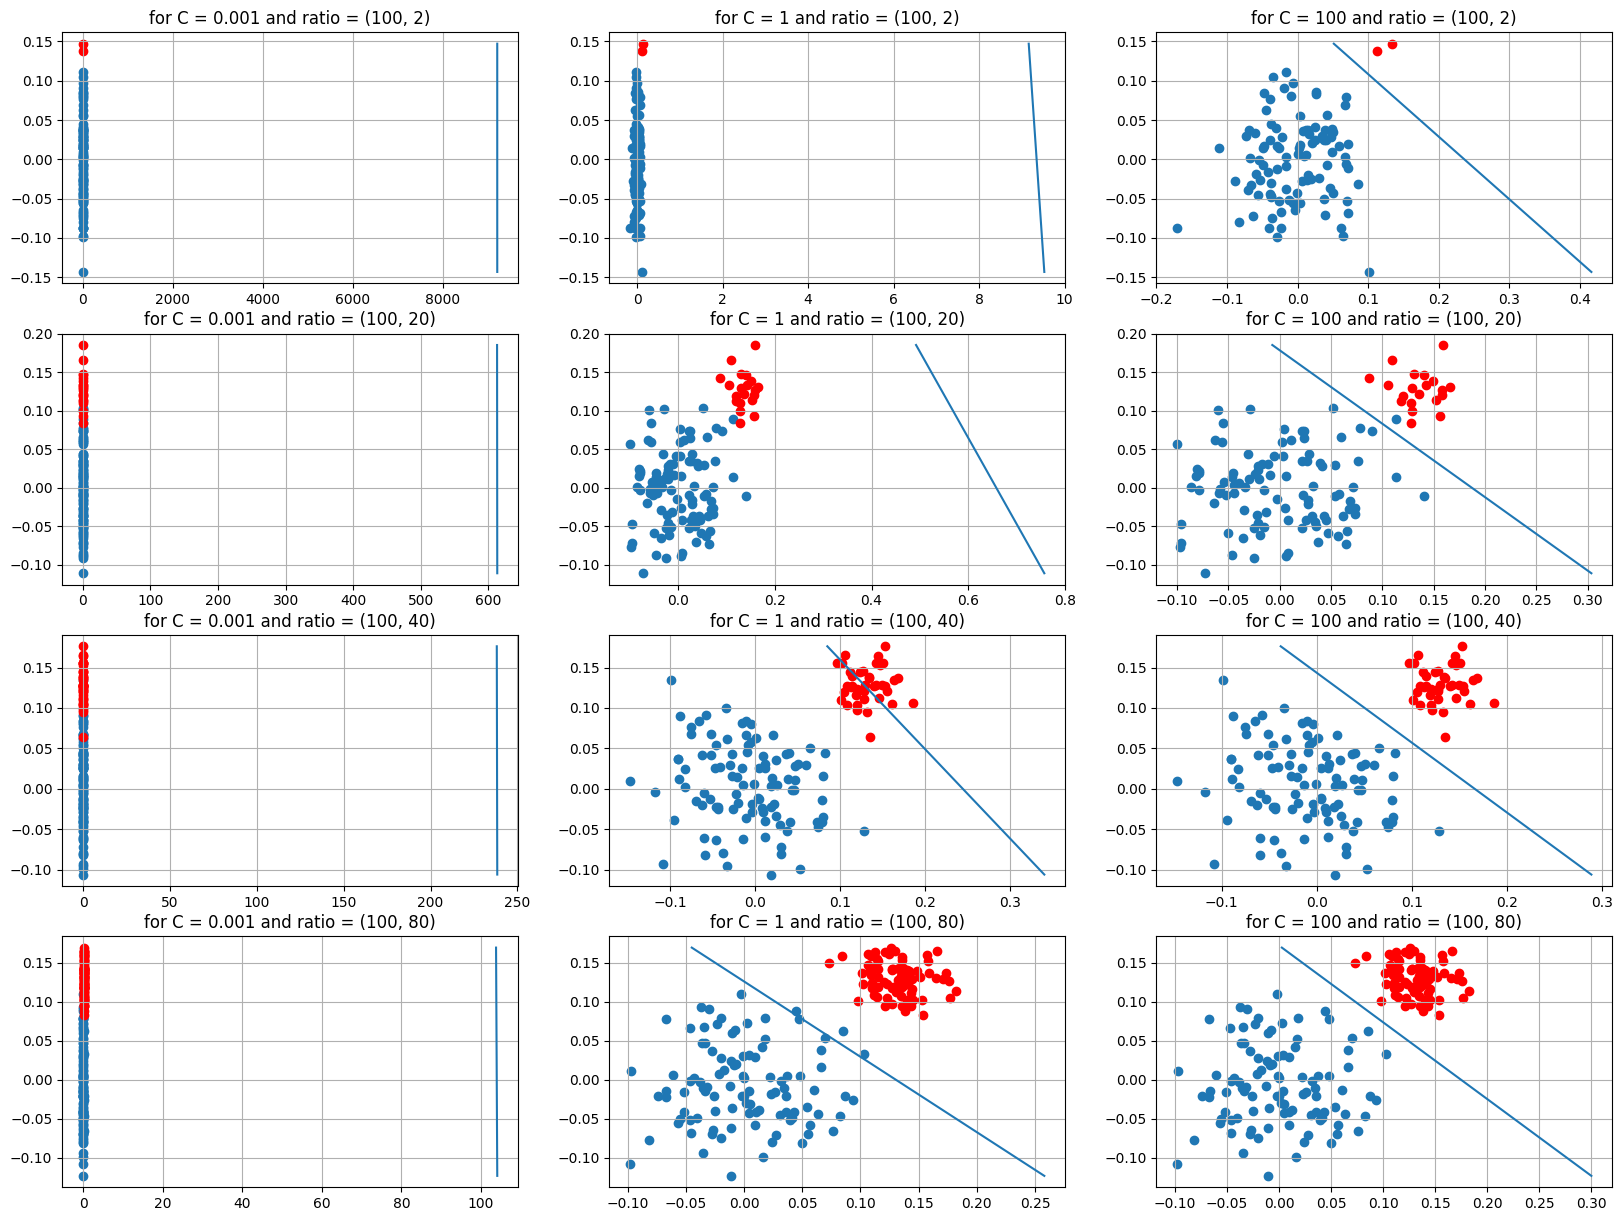

In [3]:
#list of tuples where each tuple specifies the number of positive and negative samples to generate.
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
C= [0.001, 1, 100]
index=1

plt.figure(figsize=(20,15))

for i in ratios:
    X_p = np.random.normal(0,0.05,size=(i[0],2))
    X_n = np.random.normal(0.13,0.02,size=(i[1],2))
    y_p = np.ones((i[0],1))
    y_n = np.zeros((i[1],1))
    X = np.vstack((X_p,X_n))
    y = np.vstack((y_p,y_n))
    
    for j in C:
        plt.subplot(len(ratios),len(C), index)
        plt.title("for C = {} and ratio = {}".format(j,i))
        plt.grid()
        plt.scatter(X_p[:,0],X_p[:,1])
        plt.scatter(X_n[:,0],X_n[:,1],color='red')
        
        clf = SVC(C=j, kernel="linear")
        clf.fit(X,y)
        
        coef, intercept = clf.coef_[0], clf.intercept_[0]
        mi, ma = min(X[:,1]), max(X[:,1])
        draw_line(coef, intercept, mi, ma)
        
        index += 1

### Observations

C is a Regularization parameter i.e. a hyper parameter.
> The strength of the regularization is inversely proportional to C. it Must be strictly positive.

> Decreasing C corresponds to more regularization.

> As regularization strength increases, it moves to underfit.

> As regularization strength decreases, it tries to recognize dataset has 2 classes at larger c(c=100) which results in correct fitting to the data for both SVM and LogisticRegression.

## 8A_LR_SVM: Task 2: Applying LR


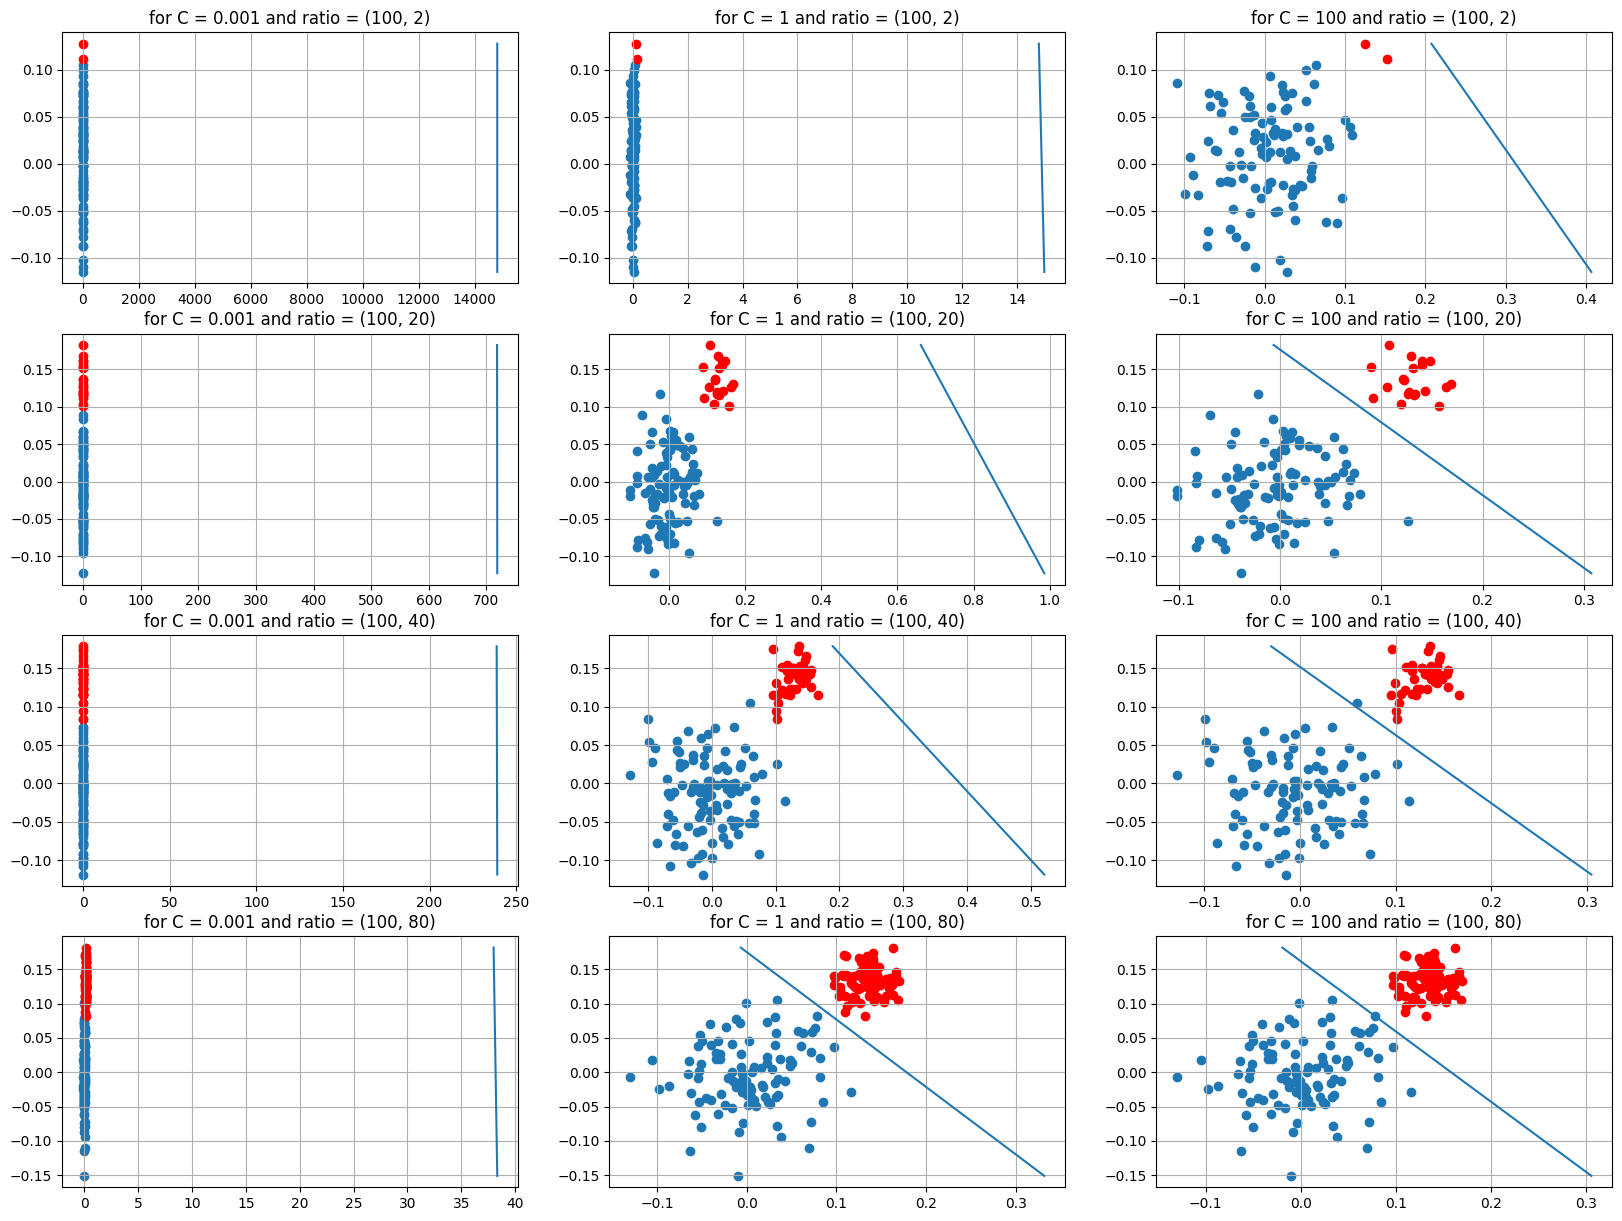

In [4]:
#list of tuples where each tuple specifies the number of positive and negative samples to generate.

ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
C= [0.001, 1, 100]
index=1

plt.figure(figsize=(20,15))

for i in ratios:
    X_p = np.random.normal(0,0.05,size=(i[0],2))
    X_n = np.random.normal(0.13,0.02,size=(i[1],2))
    y_p = np.ones((i[0],1))
    y_n = np.zeros((i[1],1))
    X = np.vstack((X_p,X_n))
    y = np.vstack((y_p,y_n))
    
    for j in C:
        plt.subplot(len(ratios),len(C), index)
        plt.title("for C = {} and ratio = {}".format(j,i))
        plt.grid()
        plt.scatter(X_p[:,0],X_p[:,1])
        plt.scatter(X_n[:,0],X_n[:,1],color='red')
        
        clf = LogisticRegression(C = j, random_state = 20)
        clf.fit(X,y)
        
        coef, intercept = clf.coef_[0], clf.intercept_[0]
        mi, ma = min(X[:,1]), max(X[:,1])
        draw_line(coef, intercept, mi, ma)
        
        index += 1

### Observations

C is a Regularization parameter i.e. a hyper parameter.
> The strength of the regularization is inversely proportional to C. it Must be strictly positive.

> Decreasing C corresponds to more regularization.

> As regularization strength increases, it moves to underfit.

> As regularization strength decreases, it tries to recognize dataset has 2 classes at larger c(c=100) which results in correct fitting to the data 

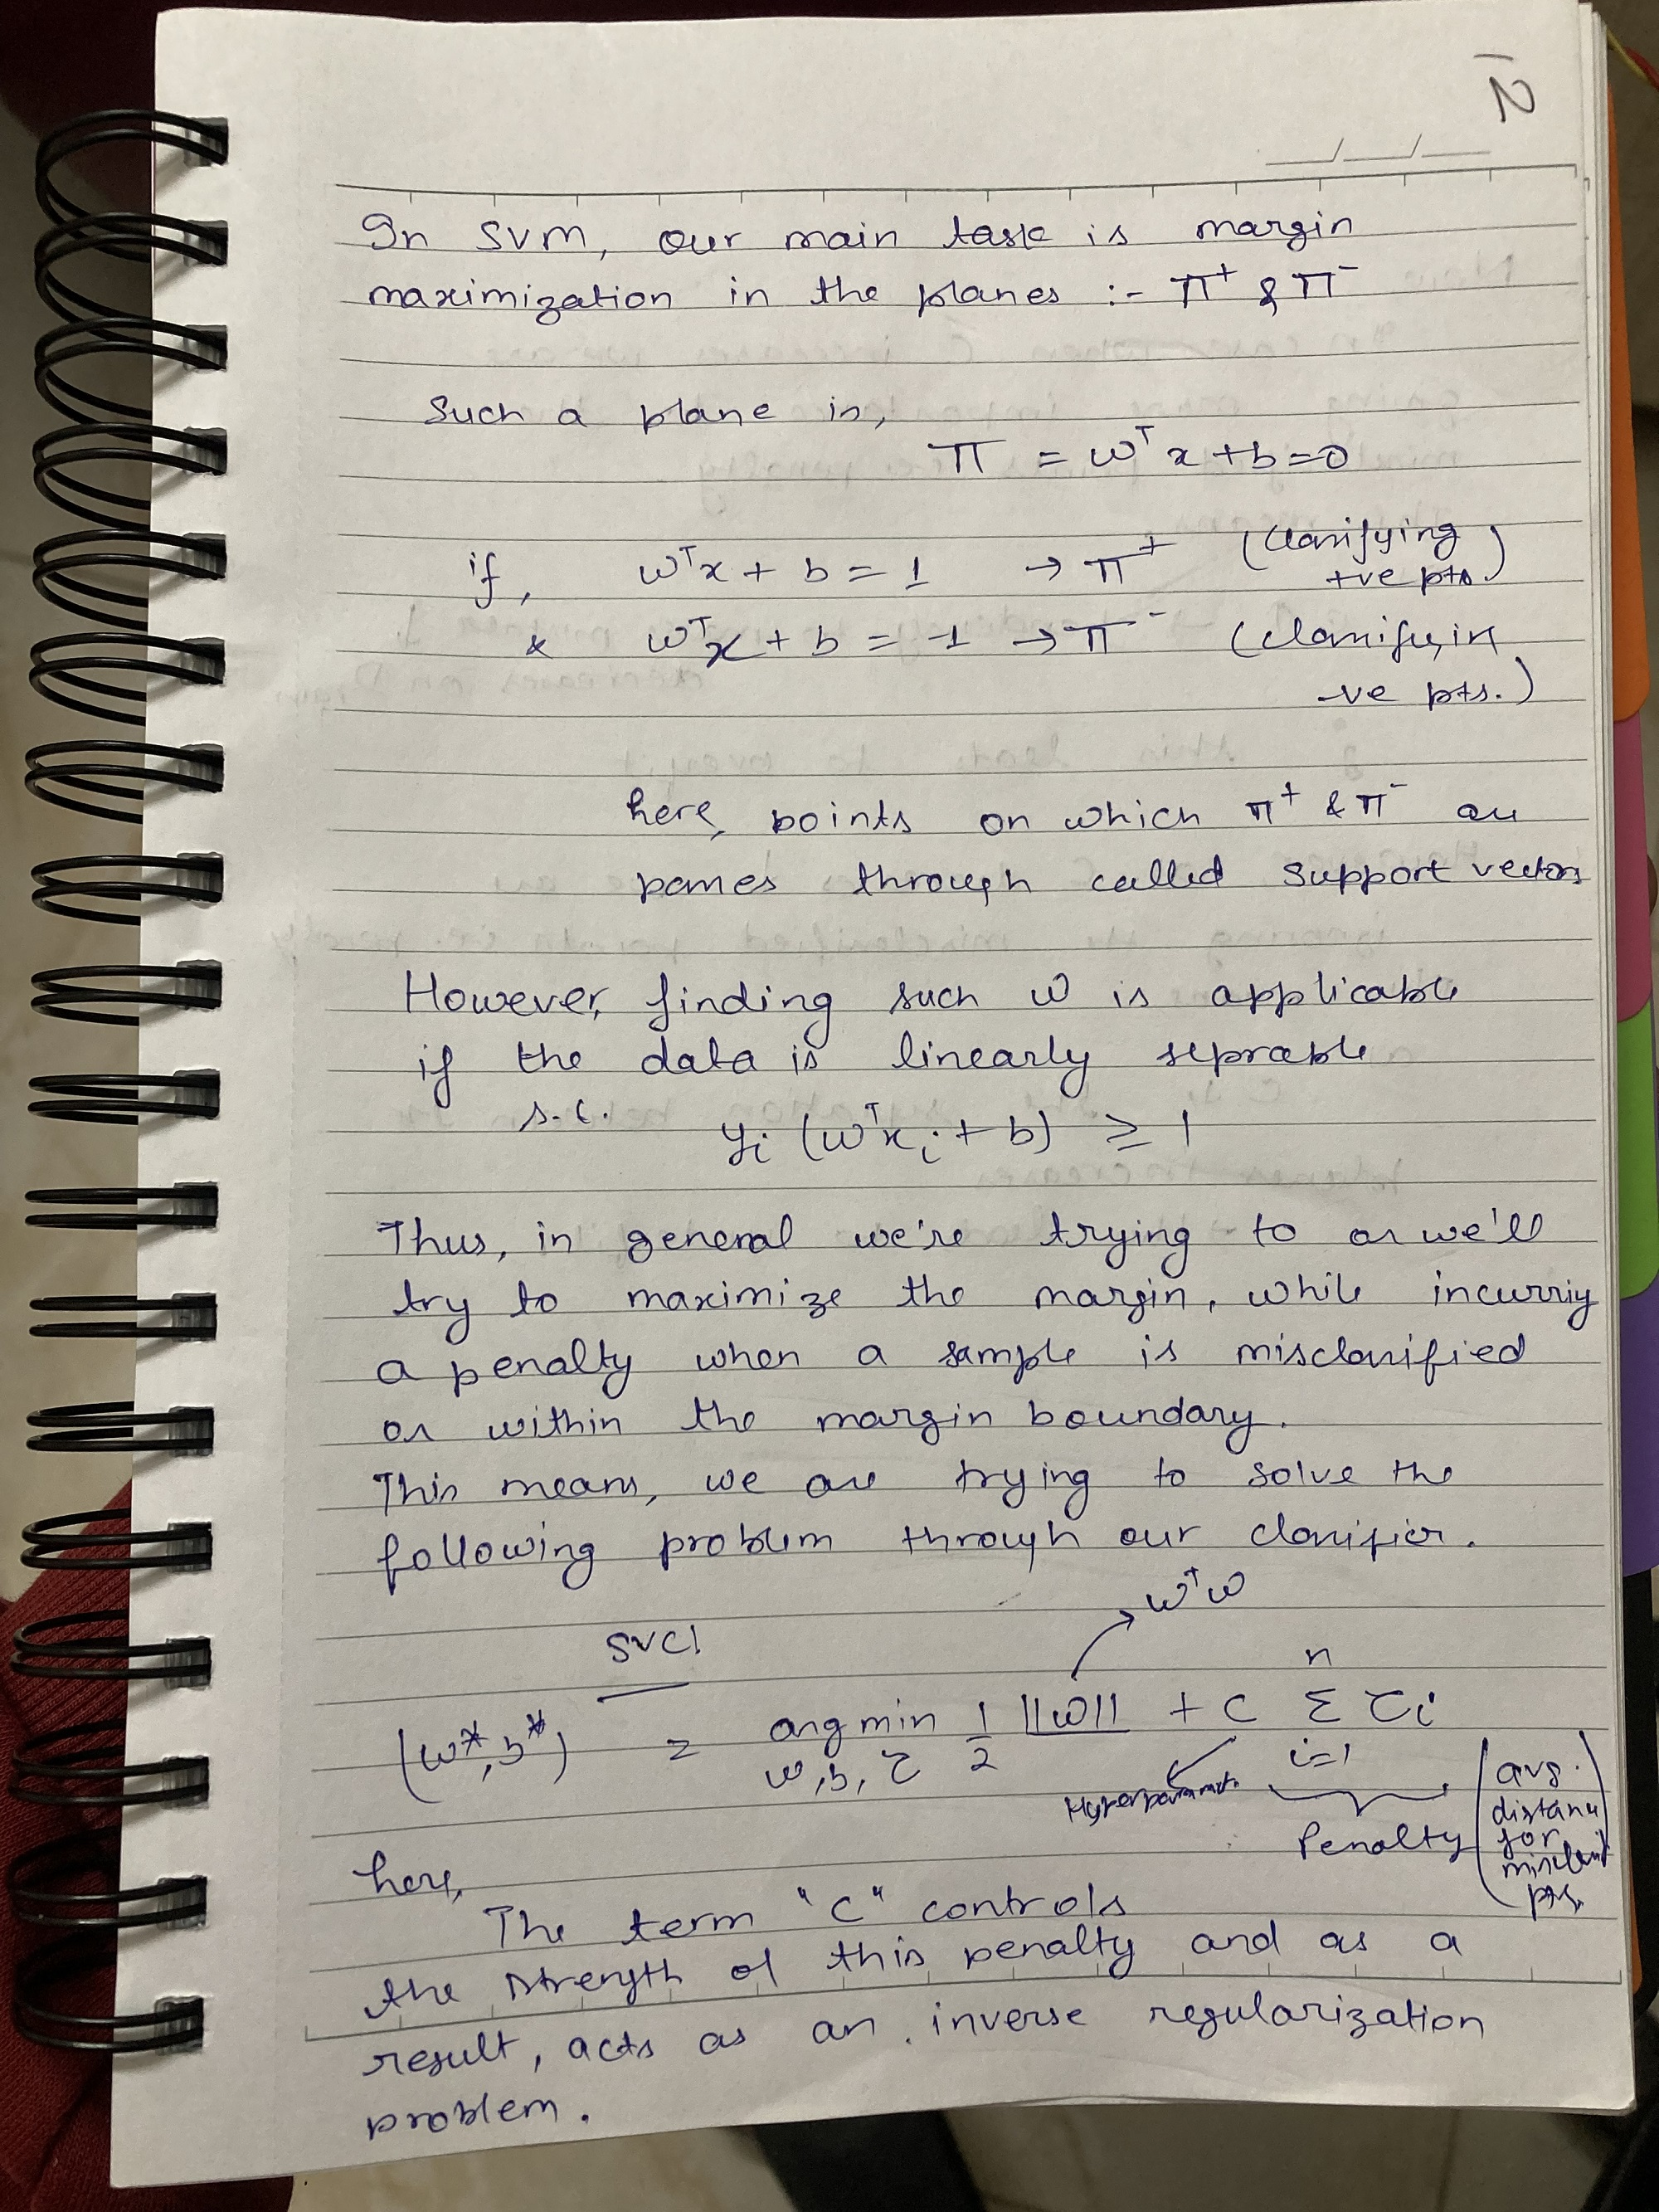

In [5]:
from IPython.display import Image
Image(filename='image_67201793.jpg', width=800, height=600)

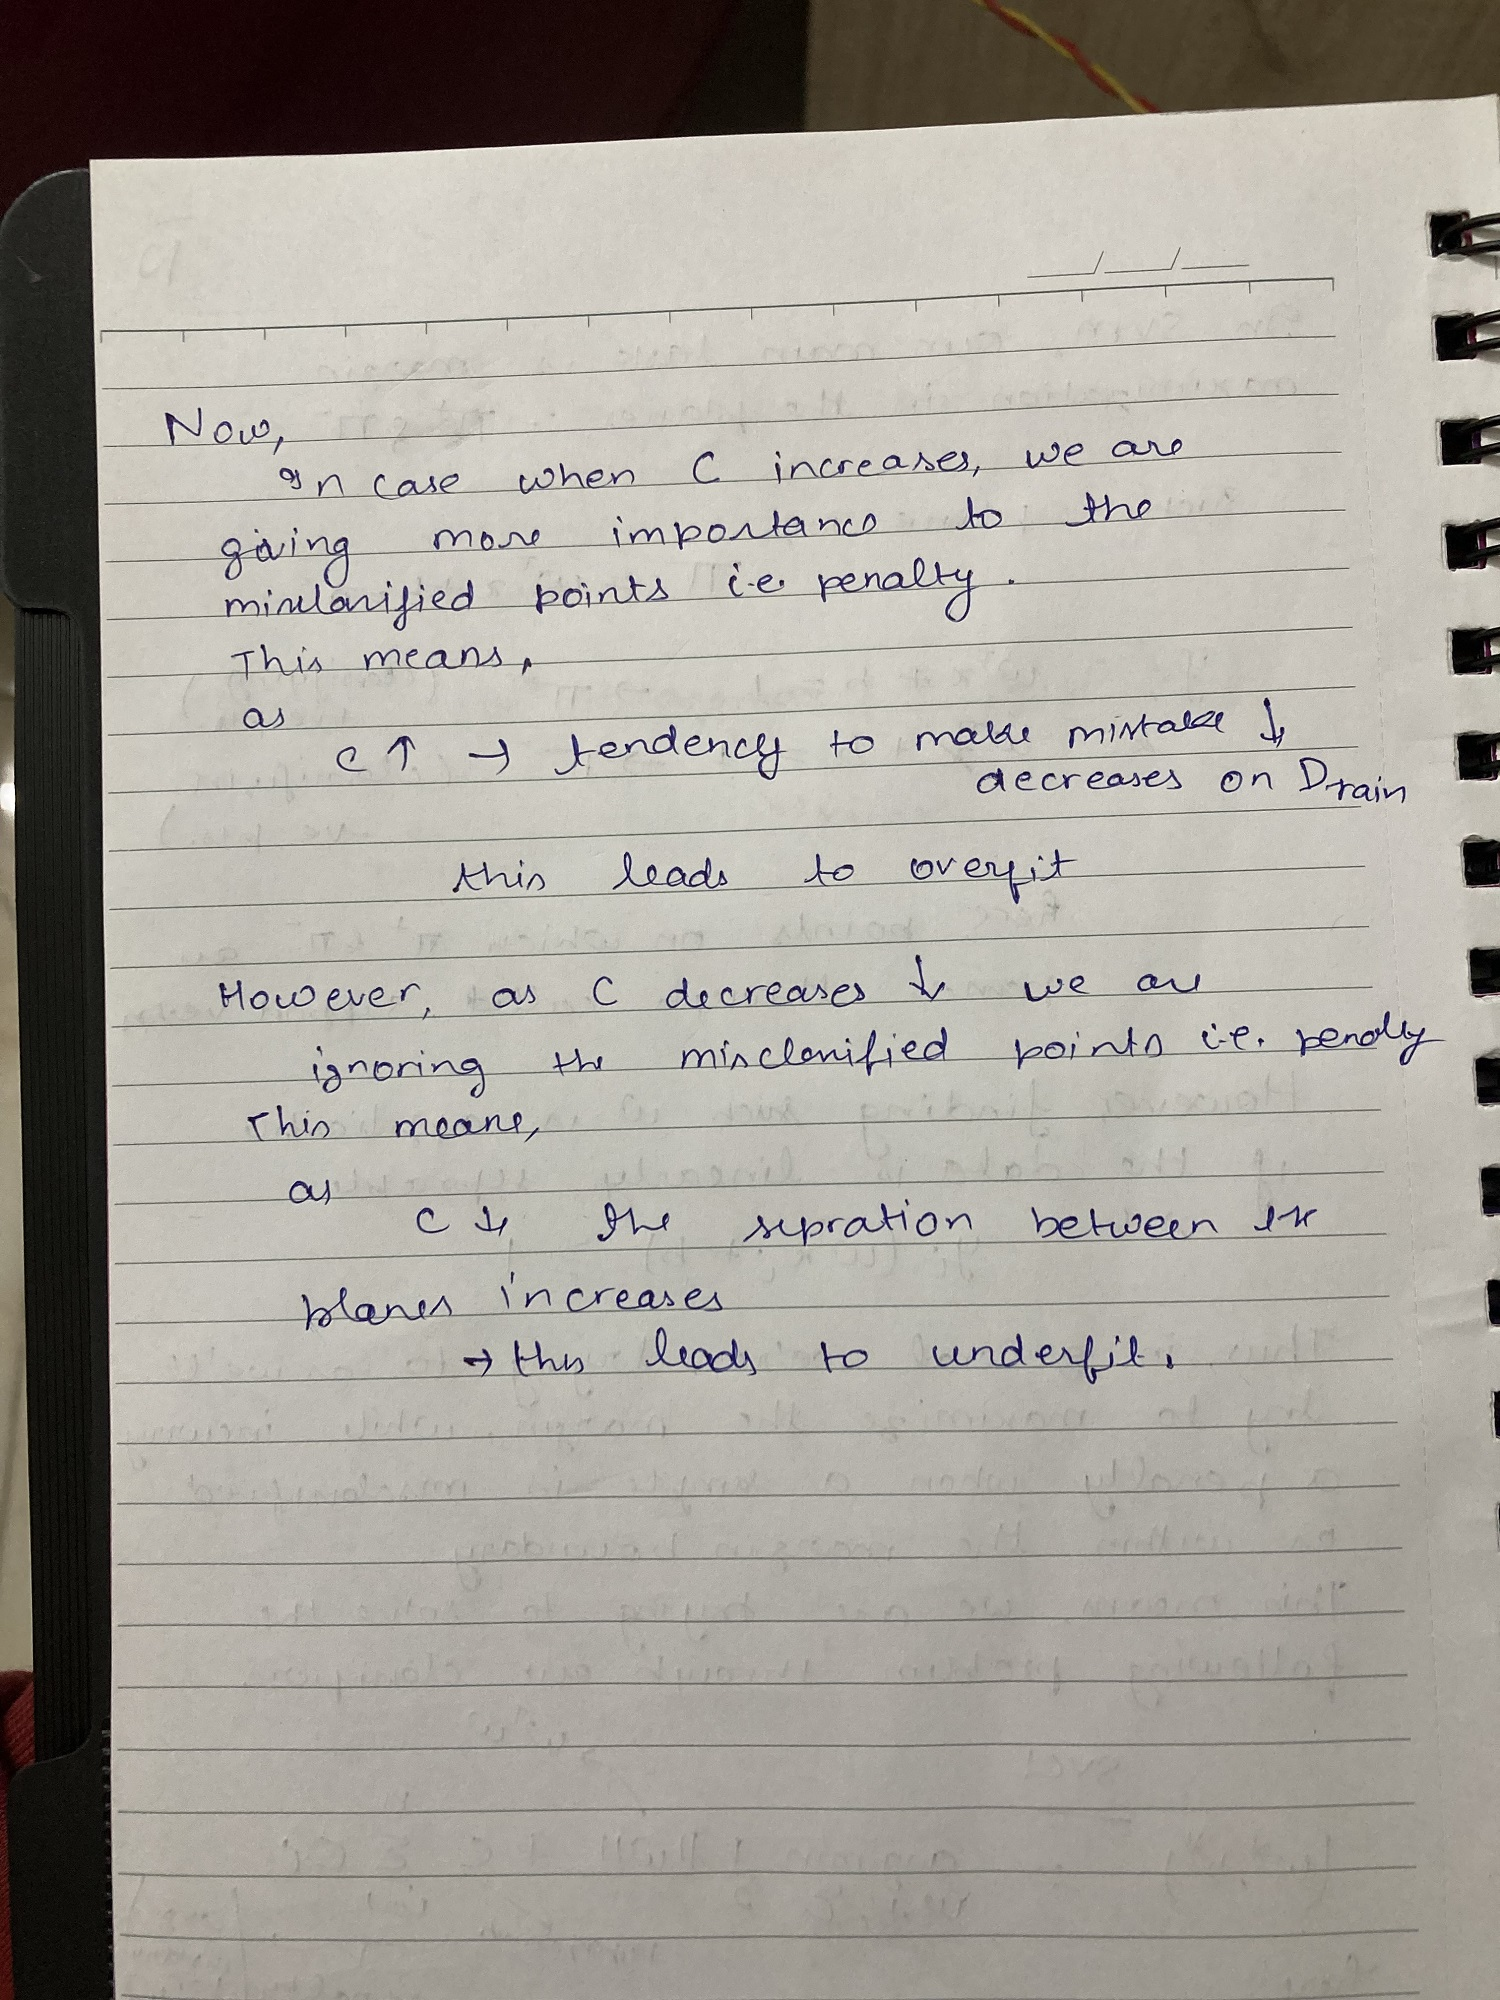

In [6]:
Image(filename='image_67173889.jpg', width=800, height=600)

## 8B_LR_SVM

In [7]:
data = pd.read_csv('task_b.csv')
data=data.iloc[:,1:]

In [8]:
data.head()

f1            f2        f3    y
0  -195.871045 -14843.084171  5.532140  1.0
1 -1217.183964  -4068.124621  4.416082  1.0
2     9.138451   4413.412028  0.425317  0.0
3   363.824242  15474.760647  1.094119  0.0
4  -768.812047  -7963.932192  1.870536  0.0

In [9]:
data.corr()['y']

f1    0.067172
f2   -0.017944
f3    0.839060
y     1.000000
Name: y, dtype: float64

In [10]:
data.std()

f1      488.195035
f2    10403.417325
f3        2.926662
y         0.501255
dtype: float64

In [11]:
X=data[['f1','f2','f3']].values
Y=data['y'].values
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


# What if our features are with different variance 

<pre>
* <b>As part of this task you will observe how linear models work in case of data having feautres with different variance</b>
* <b>from the output of the above cells you can observe that var(F2)>>var(F1)>>Var(F3)</b>

<pre>

<pre>

> <b>Task1</b>:    
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' and check the feature importance 
    2. Apply SVM(SGDClassifier with hinge) on 'data' and check the feature importance

</pre>


In [12]:
clf_sgd_logloss = SGDClassifier(loss = 'log', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=20, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)
clf_sgd_logloss.fit(X,Y)
coef_sgd_logloss = clf_sgd_logloss.coef_  #Weights assigned to the features

w1_logloss, w2_logloss, w3_logloss = coef_sgd_logloss[0]
print("Weights assigned to f1:{}".format(w1_logloss))
print("Weights assigned to f2:{}".format(w2_logloss))
print("Weights assigned to f3:{}".format(w3_logloss))

Weights assigned to f1:10035.709041014443
Weights assigned to f2:9951.886767383477
Weights assigned to f3:10702.833636188734


In [13]:
clf_sgd_hingeloss = SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=20, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)
clf_sgd_hingeloss.fit(X,Y)
coef_sgd_hingeloss = clf_sgd_hingeloss.coef_  #Weights assigned to the features

w1_hingeloss, w2_hingeloss, w3_hingeloss = coef_sgd_hingeloss[0]
print("Weights assigned to f1: {}".format(w1_hingeloss))
print("Weights assigned to f2:{}".format(w2_hingeloss))
print("Weights assigned to f3:{}".format(w3_hingeloss))

Weights assigned to f1: 11835.753162345287
Weights assigned to f2:10055.88831477836
Weights assigned to f3:10593.15013216602


ACCORDING TO ABOVE RESULTS IMPORTANT FEATURES ARE f2>f1>f3 IT IS PROPORTIONAL TO VARIENCE OF FEATURES( var(F2)>>var(F1)>>Var(F3))
BOTH IN LR AND SVM FEATURES WHICH HAVE HIGH VARIENCE IS THE MOST IMPORTANT FEATURE
SINCE f2 HAS HIGH NEGATIVE VALUE DOES NOT MEAN IT HAVE IMPACT ON CLASSYFYING NEGATIVE CLASS BECAUSE OUR DATA NOT STANDARDIZED

<pre>
> Task2:
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance

In [14]:
# Scale the feature to zero mean Unit variance
Standard_Scaler = StandardScaler()
X_scaler = Standard_Scaler.fit_transform(X)

clf_sgd_logloss_std = SGDClassifier(loss = 'log', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)
clf_sgd_logloss_std.fit(X_scaler,Y)
coef_sgd_logloss_std = clf_sgd_logloss_std.coef_  #Weights assigned to the features

w1_logloss_std, w2_logloss_std, w3_logloss_std = coef_sgd_logloss[0]
print("Weights assigned to f1:{}".format(w1_logloss_std))
print("Weights assigned to f2:{}".format(w2_logloss_std))
print("Weights assigned to f3:{}".format(w3_logloss_std))

Weights assigned to f1:10035.709041014443
Weights assigned to f2:9951.886767383477
Weights assigned to f3:10702.833636188734


In [15]:
clf_sgd__hingeloss_std = SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)
clf_sgd__hingeloss_std.fit(X_scaler,Y)
coef_sgd__hingeloss_std = clf_sgd__hingeloss_std.coef_  #Weights assigned to the features

w1_hingeloss_std, w2_hingeloss_std, w3_hingeloss_std = coef_sgd_hingeloss[0]
print("Weights assigned to f1:{}".format(w1_hingeloss_std))
print("Weights assigned to f2:{}".format(w2_hingeloss_std))
print("Weights assigned to f3:{}".format(w3_hingeloss_std))

Weights assigned to f1:11835.753162345287
Weights assigned to f2:10055.88831477836
Weights assigned to f3:10593.15013216602


## 8C_LR_SVM

## Task-C: Regression outlier effect.

<font face='georgia'> <h3> Objective:Visualization best fit linear regression line for different scenarios</h3> </font>

In [16]:
import scipy as sp
import scipy.optimize

def angles_in_ellipse(num,a,b):
    assert(num > 0)
    assert(a < b)
    angles = 2 * np.pi * np.arange(num) / num
    if a != b:
        e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
        tot_size = sp.special.ellipeinc(2.0 * np.pi, e)
        arc_size = tot_size / num
        arcs = np.arange(num) * arc_size
        res = sp.optimize.root(
            lambda x: (sp.special.ellipeinc(x, e) - arcs), angles)
        angles = res.x 
    return angles

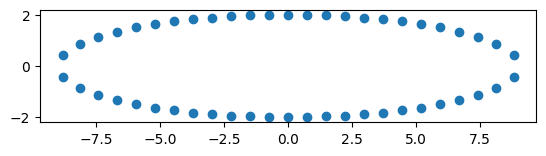

In [17]:
a = 2
b = 9
n = 50

phi = angles_in_ellipse(n, a, b)
e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
arcs = sp.special.ellipeinc(phi, e)

fig = plt.figure()
ax = fig.gca()
ax.axes.set_aspect('equal')
ax.scatter(b * np.sin(phi), a * np.cos(phi))
plt.show()

In [18]:
X= b * np.sin(phi)
Y= a * np.cos(phi)

<pre>
<font face='georgia'>
<i>
1. As a part of this assignment you will be working the regression problem and how regularization helps to get rid of outliers

2. Use the above created X, Y for this experiment.

3. to do this task you can either implement your own SGDRegression(prefered) excatly similar to "SGD assignment" with mean sequared error or 
you can use the SGDRegression of sklearn, for example "SGDRegressor(alpha=0.001, eta0=0.001, learning_rate='constant',random_state=0)" 
note that you have to use the constant learning rate and learning rate <b>eta0</b> initialized.

4. as a part of this experiment you will train your linear regression on the data (X, Y) with different regularizations alpha=[0.0001, 1, 100] and 
observe how prediction hyper plan moves with respect to the outliers

5. This the results of one of the experiment we did (title of the plot was not metioned intentionally) 
<img src='https://i.imgur.com/FctjBiD.png'> 
in each iteration we were adding single outlier and observed the movement of the hyper plane.

6. please consider this list of outliers: [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)] in each of tuple the first elemet 
is the input feature(X) and the second element is the output(Y)

7. for each regularizer, you need to add these outliers one at time to data and then train your model 
again on the updated data. 

8. you should plot a 3*5 grid of subplots,
 where each row corresponds to results of model with a single regularizer.

9. Algorithm: 

for each regularizer:
    for each outlier:
        #add the outlier to the data
        #fit the linear regression to the updated data
        #get the hyper plane
        #plot the hyperplane along with the data points

10. MAKE SURE YOU WRITE THE DETAILED OBSERVATIONS, PLEASE CHECK THE LOSS FUNCTION IN THE SKLEARN DOCUMENTATION
 (please do search for it).
</i>
</font>
</pre>

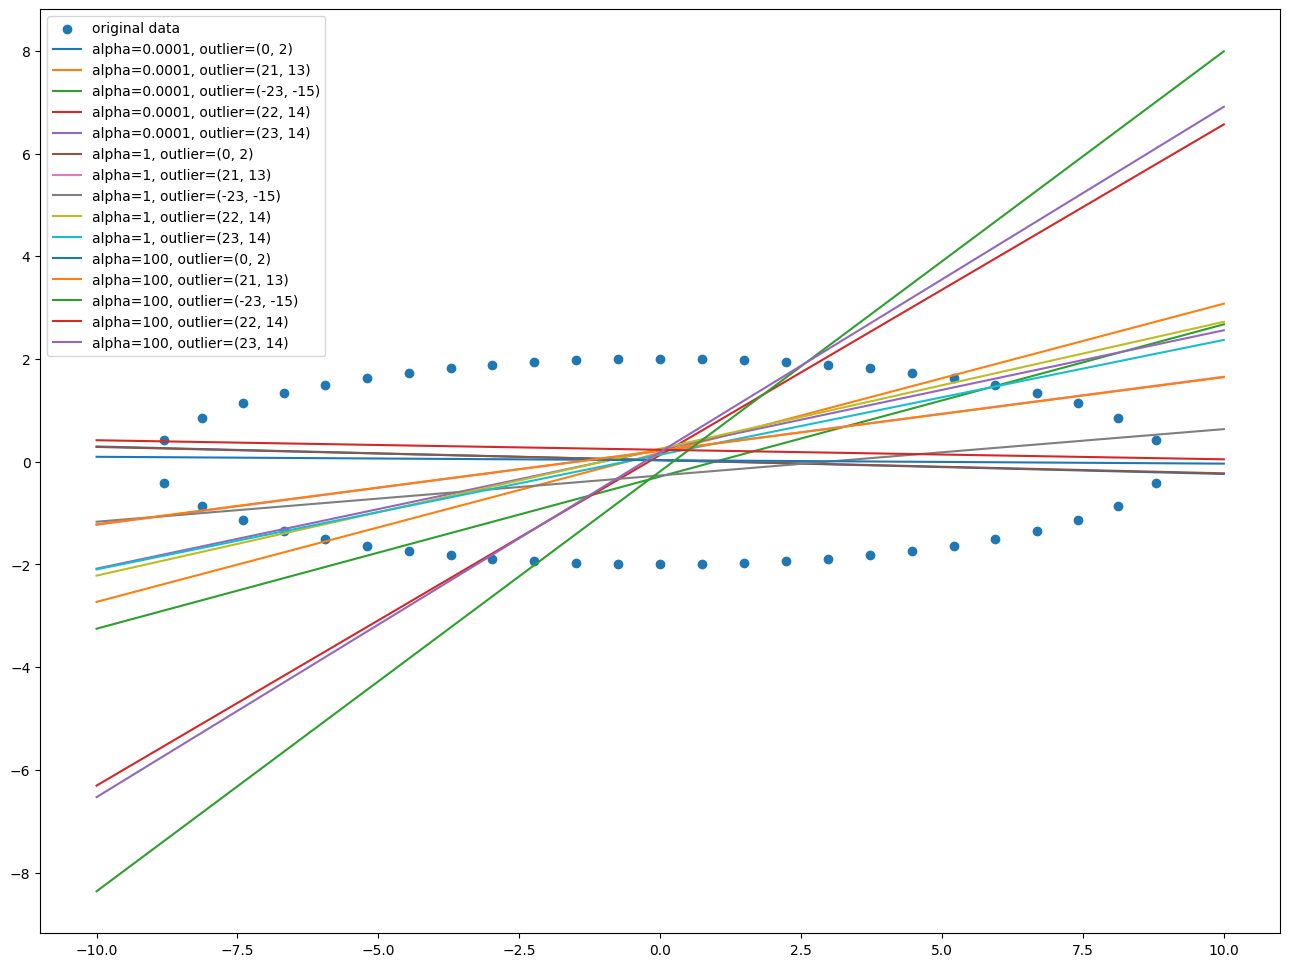

In [19]:
outliers = [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)]


# initializing the linear regression model
model = SGDRegressor(max_iter=1000, tol=1e-3)

# ploting original data
plt.figure(figsize=(16, 12))
plt.scatter(X, Y, label='original data')

for alpha in [0.0001, 1, 100]:
    model.alpha = alpha

    for outlier in outliers:
        # adding outliers to the data
        X_outliers = np.concatenate((X.reshape(-1, 1), np.array([outlier[0]]).reshape(1, -1)))
        Y_outliers = np.concatenate((Y, np.array([outlier[1]])))

        # fit the linear regression to the new data
        model.fit(X_outliers, Y_outliers)

        # generating the hyperplane
        X_pred = np.linspace(-10, 10, 100).reshape(-1, 1)
        Y_pred = model.predict(X_pred)

        # plot the hyperplane along with the data points
        plt.plot(X_pred, Y_pred, label=f'alpha={alpha}, outlier={outlier}')

plt.legend()
plt.show()

> Observations

It demonstrates the effect of regularization on a linear regression model trained on data with outliers. Here, The results show that as the regularization parameter alpha increases, the magnitude of the coefficients in the linear regression model decreases, leading to a simpler model with less sensitivity to outliers.

When outliers are added to the dataset, the hyperplane shifts towards the outliers, indicating that the linear regression model is highly sensitive to outliers. However, as the regularization parameter increases, the hyperplane shifts less and less, indicating that the model is less sensitive to outliers.

This shows that regularization can help in improving the robustness of a linear regression model to outliers. However, it is important to note that regularization alone may not be sufficient to handle all types of outliers, and other techniques such as data cleaning or feature engineering may also be necessary.

## 8D_LR_SVM

## Task-D: Collinear features and their effect on linear models

In [20]:
data = pd.read_csv('task_d.csv')

In [21]:
data.head()

x         y         z       x*x       2*y  2*z+3*x*x         w   
0 -0.581066  0.841837 -1.012978 -0.604025  0.841837  -0.665927 -0.536277  \
1 -0.894309 -0.207835 -1.012978 -0.883052 -0.207835  -0.917054 -0.522364   
2 -1.207552  0.212034 -1.082312 -1.150918  0.212034  -1.166507  0.205738   
3 -1.364174  0.002099 -0.943643 -1.280666  0.002099  -1.266540 -0.665720   
4 -0.737687  1.051772 -1.012978 -0.744934  1.051772  -0.792746 -0.735054   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [22]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression


1. Finding the Correlation between the features

> a. check the correlation between the features

In [23]:
data.corr()

x         y         z       x*x       2*y  2*z+3*x*x   
x          1.000000 -0.205926  0.812458  0.997947 -0.205926   0.996252  \
y         -0.205926  1.000000 -0.602663 -0.209289  1.000000  -0.261123   
z          0.812458 -0.602663  1.000000  0.807137 -0.602663   0.847163   
x*x        0.997947 -0.209289  0.807137  1.000000 -0.209289   0.997457   
2*y       -0.205926  1.000000 -0.602663 -0.209289  1.000000  -0.261123   
2*z+3*x*x  0.996252 -0.261123  0.847163  0.997457 -0.261123   1.000000   
w          0.583277 -0.401790  0.674486  0.583803 -0.401790   0.606860   
target     0.728290 -0.690684  0.969990  0.719570 -0.690684   0.764729   

                  w    target  
x          0.583277  0.728290  
y         -0.401790 -0.690684  
z          0.674486  0.969990  
x*x        0.583803  0.719570  
2*y       -0.401790 -0.690684  
2*z+3*x*x  0.606860  0.764729  
w          1.000000  0.641750  
target     0.641750  1.000000

>    b. plot heat map of correlation matrix using seaborn heatmap

<Axes: >

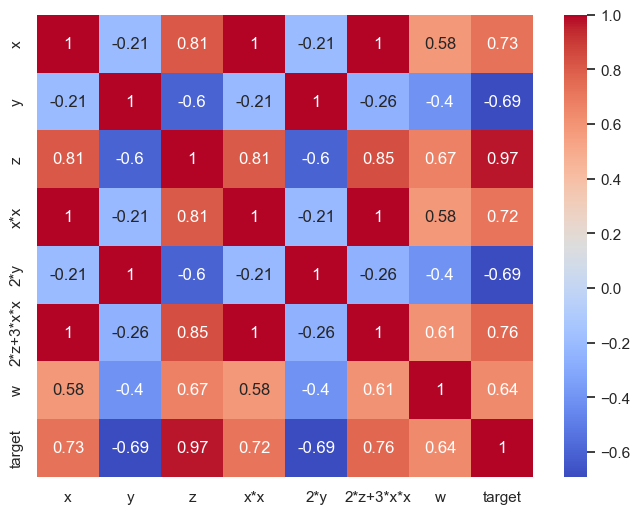

In [24]:
# https://androidkt.com/find-correlation-between-features-and-target-using-the-correlation-matrix/#:~:text=The%20correlation%20coefficients%20are%20in,basis%20for%20filter%20feature%20selection.
sns.set(rc = {'figure.figsize':(8,6)})
sns.heatmap(data.corr(),cmap= 'coolwarm', annot = True)

2. Finding the best model for the given data

 <pr>

    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'

<pr>

In [25]:
# https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/

# define model
model_logreg = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

# define search space:
# search space is defined as a dictionary where the names are the hyperparameter arguments to the model and the values are discrete values or a distribution of values to sample in the case of a random search.
# choose the alpha in log space
alpha =  np.logspace(-8, 8, 10)
param_grid={'C':alpha}

# define evaluation: 
# defining and specifying a cross-validation object to gain more control over model evaluation and make the evaluation procedure obvious and explicit.
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# GridSearchCV also provide a “scoring” argument that takes a string indicating the metric to optimize.
# The metric must be maximizing, meaning better models result in larger scores. 
# For classification, this may be ‘accuracy‘. 
# For regression, this is a negative error measure, such as ‘neg_mean_absolute_error‘ for a negative version of the mean absolute error, where values closer to zero represent less prediction error by the model.

# define search:
# the search can be made parallel, e.g. use all of the CPU cores by specifying the “n_jobs” argument as an integer with the number of cores in your system, e.g. 8. 
# Or we can set it to be -1 to automatically use all of the cores in your system.
search_logreg = GridSearchCV(model_logreg, param_grid, scoring='accuracy', n_jobs=-1, cv=cv)

# execute search: 
# Once defined, the search is performed by calling the fit() function and providing a dataset used to train and evaluate model hyperparameter combinations using cross-validation.
# Running the search may take minutes or hours, depending on the size of the search space and the speed of the hardware. 
result_logreg = search_logreg.fit(X, Y)

# summarize result: 
# Once search is completed, we can access all of the results via attributes on the class. 
# Perhaps the most important attributes are the best score observed and the hyperparameters that achieved the best score.

print('Best Score: ', result_logreg.best_score_)
print('Best Hyperparameters: ', result_logreg.best_params_)


Best Score:  1.0
Best Hyperparameters:  {'C': 1e-08}


<pre>
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_
<pre>


In [26]:
#https://machinelearningmastery.com/make-predictions-scikit-learn/

best_model_logreg = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1e-08, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
best_model_logreg.fit(X,Y)

LogisticRegression(C=1e-08)

### There are two types of classification predictions we may wish to make with our finalized model, they are: 1. class predictions and 2. Probability predictions.

> Class prediction: 
 <pr>
 
    Given the finalized model and one or more data instances, predict the class for the data instances.
    We do not know the outcome classes for the new data. That is why we need the model in the first place.
    We can predict the class for new data instances using our finalized classification model in scikit-learn using the predict() function.
  
<pr>

In [27]:
# make a prediction
Y_new_logreg = best_model_logreg.predict(X)

# show the inputs and predicted outputs
for i in range(5):
    print("X = {}, Predicted= {}".format(X[i], Y_new_logreg[i]))

X = [-0.5810659   0.84183714 -1.01297765 -0.60402468  0.84183714 -0.66592679
 -0.53627703], Predicted= 0
X = [-0.89430898 -0.2078351  -1.01297765 -0.88305213 -0.2078351  -0.91705408
 -0.52236404], Predicted= 0
X = [-1.20755205  0.21203379 -1.08231219 -1.15091848  0.21203379 -1.16650718
  0.20573767], Predicted= 0
X = [-1.36417359  0.00209934 -0.94364311 -1.28066624  0.00209934 -1.26653955
 -0.66571996], Predicted= 0
X = [-0.73768744  1.05177159 -1.01297765 -0.74493354  1.05177159 -0.79274607
 -0.73505412], Predicted= 0


> Probability Predictions: 
 <pr>
 
    This is called a probability prediction where given a new instance, the model returns the probability for each outcome class as a value between 0 and 1.
    We can make these types of predictions in scikit-learn by calling the predict_proba() function, as shown beloW:
  
<pr>

In [28]:
Y_new_proba_logreg = best_model_logreg.predict_proba(X)

# show the inputs and predicted output probability
for i in range(5):
    print("X = {}, Predicted probability= {}".format(X[i], Y_new_proba_logreg[i]))

X = [-0.5810659   0.84183714 -1.01297765 -0.60402468  0.84183714 -0.66592679
 -0.53627703], Predicted probability= [0.50000048 0.49999952]
X = [-0.89430898 -0.2078351  -1.01297765 -0.88305213 -0.2078351  -0.91705408
 -0.52236404], Predicted probability= [0.50000038 0.49999962]
X = [-1.20755205  0.21203379 -1.08231219 -1.15091848  0.21203379 -1.16650718
  0.20573767], Predicted probability= [0.50000048 0.49999952]
X = [-1.36417359  0.00209934 -0.94364311 -1.28066624  0.00209934 -1.26653955
 -0.66571996], Predicted probability= [0.50000053 0.49999947]
X = [-0.73768744  1.05177159 -1.01297765 -0.74493354  1.05177159 -0.79274607
 -0.73505412], Predicted probability= [0.50000057 0.49999943]


In [29]:
#accuracy of the model 'best_model_accuracy'
best_model_accuracy_logreg = best_model_logreg.score(X,Y)
print("best model accuracy is: {}".format(best_model_accuracy_logreg))

#weights W using best_model.coef_
best_model_weights_logreg = best_model_logreg.coef_
print("best model weight/coef is: {}".format(best_model_weights_logreg))

best model accuracy is: 1.0
best model weight/coef is: [[ 3.64144633e-07 -3.45341749e-07  4.84994527e-07  3.59784535e-07
  -3.45341749e-07  3.82363853e-07  3.20874778e-07]]


In [30]:
len(best_model_weights_logreg)

1

<pr>

    4. Modifying original data
        a. Add a noise(order of 10^-2) to each element of X 
        and get the new data set X' (X' = X + e)
        b. Train the same 'best_model' with data (X', Y)
        c. Check the accuracy of the model 'best_model_accuracy_edited'
        d. Get the weights W' using best_model.coef_

In [31]:
#Add a noise(order of 10^-2) to each element of X and get the new data set X' (X' = X + e)

X_dash_logreg = X + .01

#Train the same 'best_model' with data (X', Y)
best_model_edited_logreg = best_model_logreg.fit(X_dash_logreg,Y)

#making predictions on the modified data
prediction_dash_logreg = best_model_logreg.predict(X_dash_logreg)

#the accuracy of the model 'best_model_accuracy_edited'
best_model_accuracy_edited_logreg = best_model_edited_logreg.score(X_dash_logreg,Y)
print("best model accuracy on modifying orignial data is: {}".format(best_model_accuracy_edited_logreg))

#The weights W' using best_model.coef_
best_model_weights_edited_logreg = best_model_edited_logreg.coef_
print("best model weight/coef is: {}".format(best_model_weights_logreg))

best model accuracy on modifying orignial data is: 1.0
best model weight/coef is: [[ 3.64144633e-07 -3.45341749e-07  4.84994527e-07  3.59784535e-07
  -3.45341749e-07  3.82363853e-07  3.20874778e-07]]


<pr>

    5.  Checking deviations in metric and weights 
        a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
        b. find the absolute change between each value of W and W' ==> |(W-W')|
        c. print the top 4 features which have higher % change in weights 
        compare to the other feature

In [32]:
#find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
diff_accuracy_logreg = abs(best_model_accuracy_edited_logreg - best_model_accuracy_logreg)
print("The Difference between 'best_model_accuracy_edited' and 'best_model_accuracy' is: {}".format(diff_accuracy_logreg))

#absolute change between each value of W and W'
abs_change_in_weights_logreg = abs((best_model_weights_logreg - best_model_weights_edited_logreg))
print("The absolute weights difference is: {}".format(abs_change_in_weights_logreg))

# calulating the percentage change in weight
abs_change_in_weights_percent_logreg=[]
for i in range (len(best_model_weights_logreg)):  
    change_in_weights_percent_logreg = (abs_change_in_weights_logreg[i]/best_model_weights_logreg[i])*100
    abs_change_in_weights_percent_logreg.append(change_in_weights_percent_logreg)
    

features_array = data.columns.values

#top 4 features which have higher % change in weights compare to the other feature
top_4_logreg = np.argsort(abs_change_in_weights_percent_logreg)
top_4_features_logreg = features_array[top_4_logreg[:,:4]]
print("The top 4 features which have higher % change in weights compare to the other feature: {}".format(top_4_features_logreg))

The Difference between 'best_model_accuracy_edited' and 'best_model_accuracy' is: 0.0
The absolute weights difference is: [[1.04947329e-16 9.95283830e-17 1.39776636e-16 1.03690703e-16
  9.95283830e-17 1.10198245e-16 9.24768337e-17]]
The top 4 features which have higher % change in weights compare to the other feature: [['y' '2*y' 'x*x' 'w']]


#### Task: 2 Linear SVM

1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.

In [33]:
data = pd.read_csv('task_d.csv')
X = data.drop(['target'], axis=1).values
Y = data['target'].values

In [34]:
# https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/

# define model
model_lrSVC = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)

# define search space:
# search space is defined as a dictionary where the names are the hyperparameter arguments to the model and the values are discrete values or a distribution of values to sample in the case of a random search.
# choose the alpha in log space
alpha =  np.logspace(-8, 8, 10)
param_grid={'C':alpha}

# define evaluation: 
# defining and specifying a cross-validation object to gain more control over model evaluation and make the evaluation procedure obvious and explicit.
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# GridSearchCV also provide a “scoring” argument that takes a string indicating the metric to optimize.
# The metric must be maximizing, meaning better models result in larger scores. 
# For classification, this may be ‘accuracy‘. 
# For regression, this is a negative error measure, such as ‘neg_mean_absolute_error‘ for a negative version of the mean absolute error, where values closer to zero represent less prediction error by the model.

# define search:
# the search can be made parallel, e.g. use all of the CPU cores by specifying the “n_jobs” argument as an integer with the number of cores in your system, e.g. 8. 
# Or we can set it to be -1 to automatically use all of the cores in your system.
search_lrSVC = GridSearchCV(model_lrSVC, param_grid, scoring='accuracy', n_jobs=-1, cv=cv)

# execute search: 
# Once defined, the search is performed by calling the fit() function and providing a dataset used to train and evaluate model hyperparameter combinations using cross-validation.
# Running the search may take minutes or hours, depending on the size of the search space and the speed of the hardware. 
result_lrSVC = search_lrSVC.fit(X, Y)

# summarize result: 
# Once search is completed, we can access all of the results via attributes on the class. 
# Perhaps the most important attributes are the best score observed and the hyperparameters that achieved the best score.

print('Best Score: ', result_lrSVC.best_score_)
print('Best Hyperparameters: ',result_lrSVC.best_params_)


Best Score:  1.0
Best Hyperparameters:  {'C': 1e-08}


<pre>
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_
<pre>


In [35]:
#https://machinelearningmastery.com/make-predictions-scikit-learn/

best_model_lrSVC = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1e-08, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
best_model_lrSVC.fit(X,Y)

LinearSVC(C=1e-08)

In [36]:
# make a prediction
Y_new_lrSVC = best_model_logreg.predict(X)

# show the inputs and predicted outputs
for i in range(5):
    print("X = {}, Predicted= {}".format(X[i], Y_new_lrSVC[i]))

X = [-0.5810659   0.84183714 -1.01297765 -0.60402468  0.84183714 -0.66592679
 -0.53627703], Predicted= 0
X = [-0.89430898 -0.2078351  -1.01297765 -0.88305213 -0.2078351  -0.91705408
 -0.52236404], Predicted= 0
X = [-1.20755205  0.21203379 -1.08231219 -1.15091848  0.21203379 -1.16650718
  0.20573767], Predicted= 0
X = [-1.36417359  0.00209934 -0.94364311 -1.28066624  0.00209934 -1.26653955
 -0.66571996], Predicted= 0
X = [-0.73768744  1.05177159 -1.01297765 -0.74493354  1.05177159 -0.79274607
 -0.73505412], Predicted= 0


In [37]:
#accuracy of the model 'best_model_accuracy'
best_model_accuracy_lrSVC = best_model_lrSVC.score(X,Y)
print("best model accuracy is: {}".format(best_model_accuracy_lrSVC))

#weights W using best_model.coef_
best_model_weights_lrSVC = best_model_lrSVC.coef_
print("best model weight/coef is: {}".format(best_model_weights_lrSVC))

best model accuracy is: 1.0
best model weight/coef is: [[ 1.45657283e-06 -1.38136336e-06  1.93997236e-06  1.43913242e-06
  -1.38136336e-06  1.52944957e-06  1.28349437e-06]]


In [38]:
#Add a noise(order of 10^-2) to each element of X and get the new data set X' (X' = X + e)

X_dash_lrSVC = X + .01

#Train the same 'best_model' with data (X', Y)
best_model_edited_lrSVC = best_model_lrSVC.fit(X_dash_lrSVC,Y)

#making predictions on the modified data
prediction_dash_lrSVC = best_model_lrSVC.predict(X_dash_lrSVC)

#the accuracy of the model 'best_model_accuracy_edited'
best_model_accuracy_edited_lrSVC = best_model_edited_lrSVC.score(X_dash_lrSVC,Y)
print("best model accuracy on modifying orignial data is: {}".format(best_model_accuracy_edited_lrSVC))

#The weights W' using best_model.coef_
best_model_weights_edited_lrSVC = best_model_edited_lrSVC.coef_
print("best model weight/coef is: {}".format(best_model_weights_lrSVC))

best model accuracy on modifying orignial data is: 1.0
best model weight/coef is: [[ 1.45657283e-06 -1.38136336e-06  1.93997236e-06  1.43913242e-06
  -1.38136336e-06  1.52944957e-06  1.28349437e-06]]


In [39]:
#find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
diff_accuracy_lrSVC = abs(best_model_accuracy_edited_lrSVC - best_model_accuracy_lrSVC)
print("The Difference between 'best_model_accuracy_edited' and 'best_model_accuracy' is: {}".format(diff_accuracy_lrSVC))

#absolute change between each value of W and W'
abs_change_in_weights_lrSVC = abs((best_model_weights_lrSVC - best_model_weights_edited_lrSVC))
print("The absolute weights difference is: {}".format(abs_change_in_weights_lrSVC))

# calulating the percentage change in weight
abs_change_in_weights_percent_lrSVC=[]
for i in range (len(best_model_weights_lrSVC)):  
    change_in_weights_percent_lrSVC = (abs_change_in_weights_lrSVC[i]/best_model_weights_lrSVC[i])*100
    abs_change_in_weights_percent_lrSVC.append(change_in_weights_percent_lrSVC)

#top 4 features which have higher % change in weights compare to the other feature
features_array = data.columns.values
top_4_lrSVC = np.argsort(abs_change_in_weights_percent_lrSVC)
top_4_features_lrSVC = features_array[top_4_lrSVC[:,:4]]
print("The top 4 features which have higher % change in weights compare to the other feature: {}".format(top_4_features_lrSVC))

The Difference between 'best_model_accuracy_edited' and 'best_model_accuracy' is: 0.0
The absolute weights difference is: [[1.08242639e-13 2.20412234e-13 2.02909678e-13 1.07874464e-13
  2.20412234e-13 1.21591548e-13 8.19645514e-13]]
The top 4 features which have higher % change in weights compare to the other feature: [['y' '2*y' 'x' 'x*x']]


>Observation:
1. It is clearly visible from the correlation matrix that some features are highly correlated.
2. However, this multi collinearity does not affect the accuracy of the models.
3. Observations based on the results we get from the deviations of weights in both Logistic Regression and linear SVM: Based on the top 4 features which have higher % change in weights of the given data and noisy data we can conclude that features having multi colinearity or high corelation with others are affected by the outliers (i.e., added noise) and the weight coefficient are changing for those features.

<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In kernel SVM, the goal is to find a hyperplane in the feature space that separates the two classes of data points as well as possible. This hyperplane can be nonlinear, meaning it can have a complex shape that bends and twists in various ways.

To do this, we first transform the original data points into a higher-dimensional space using a kernel function. This kernel function essentially maps each data point into a new space where it's easier to find a hyperplane that separates the two classes.

Once we have the transformed data, we can train a SVM model to find the hyperplane that maximizes the margin between the two classes. The margin is the distance between the hyperplane and the closest data points on either side.

The decision function in kernel SVM is a way of making predictions for new data points based on their position relative to the hyperplane. The decision function computes a score for each data point that measures how close it is to the hyperplane.

If the score is positive, it means the data point is on one side of the hyperplane (the side where the positive class is located). If the score is negative, it means the data point is on the other side of the hyperplane (the side where the negative class is located).

To make a prediction for a new data point, we simply compute its score using the decision function, and then assign it to the class with the highest score. If the score is positive, we predict the positive class, and if the score is negative, we predict the negative class.

In [40]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

# split data into 60% training set, 20% cross-validation set, and 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [41]:

#instance of the SVC class from scikit-learn, with gamma=0.001 and C=100. as hyperparameters.
svc_model = SVC(gamma=0.001, C=100.)

#Training the SVM model on the training data using the fit() method of the SVC class.
svc_model.fit(X_train, y_train)

# Get the support vectors and their corresponding coefficients
support_vectors = svc_model.support_vectors_
coefficients = svc_model.dual_coef_
intercept = svc_model.intercept_
gamma = svc_model.gamma

print("Support vectors:\n", support_vectors)
print("Coefficients:\n", coefficients)
print("Intercept:\n", intercept)
print("gamma:\n", gamma)

Support vectors:
 [[ 1.71183412  0.25506282  0.0600066   0.0875372   0.02956786]
 [-0.41241876 -0.43471621 -0.08590118 -0.12867984 -0.10073876]
 [-3.76793976 -0.93171692 -0.13047978 -0.20859374 -0.38083637]
 ...
 [-0.41198415 -0.04858814 -0.07370832 -0.09471368  0.18588504]
 [ 0.61486883 -0.28091056 -0.04702174 -0.07251714 -0.09119621]
 [ 0.93016965 -0.99246376 -0.07441496 -0.14128022 -0.60424038]]
Coefficients:
 [[-100.         -100.          -23.8466291  -100.         -100.
  -100.         -100.         -100.         -100.         -100.
  -100.         -100.         -100.         -100.         -100.
  -100.         -100.         -100.         -100.         -100.
  -100.         -100.         -100.         -100.         -100.
  -100.         -100.         -100.         -100.         -100.
  -100.         -100.         -100.         -100.         -100.
  -100.         -100.         -100.          -26.96639631 -100.
  -100.         -100.         -100.         -100.         -100.
  -100.

In [42]:
# Define a custom decision function that uses the RBF kernel
def decision_function(X, support_vectors, coefficients, intercept, gamma):
    
    # Compute the RBF kernel matrix between the input data and the support vectors
    kernel_matrix = np.exp(-gamma * np.sum((support_vectors - X[:, np.newaxis])**2, axis=2))
    
    # Compute the decision values using the kernel matrix and the dual coefficients
    decision_values = np.dot(kernel_matrix, coefficients.T) + intercept
    
    # Return the decision values as a 1D array
    return decision_values.ravel()

# Use the custom decision function to compute the decision values on the cross-validation set
fcv = decision_function(X_cv, support_vectors, coefficients, intercept, gamma)

In [43]:
# compute decision function values for validation set using scikit-learn's SVC
fcv_sklearn = svc_model.decision_function(X_cv)

# compare the two
print(np.allclose(fcv_sklearn, fcv))

True


In [44]:
# Return predicted classes based on custom decision function
np.sign(fcv).ravel()

array([-1.,  1., -1.,  1., -1.,  1., -1., -1.,  1., -1., -1., -1., -1.,
       -1., -1.,  1., -1., -1.,  1.,  1.,  1., -1., -1.,  1., -1., -1.,
        1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.,
       -1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1., -1., -1., -1.,
        1., -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1., -1.,
       -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1.,  1.,  1., -1., -1., -1., -1.,  1., -1.,  1., -1., -1.,  1.,
        1.,  1., -1., -1., -1., -1.,  1., -1., -1.,  1., -1., -1., -1.,
       -1.,  1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1., -1.,
        1., -1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1., -1., -1.,
       -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1.,
       -1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1., -1., -1.,
       -1., -1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1., -1

## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$
 ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>


if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm


In [45]:
import numpy as np

#https://github.com/FlorianMuellerklein/Machine-Learning/blob/master/LogisticClassifier.py

class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000, batch_size=32, alpha=0.01, random_state=None):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.alpha = alpha
        self.random_state = random_state
        self.theta = None
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        if self.random_state:
            np.random.seed(self.random_state)
        
        # Add intercept term to X
        X = np.insert(X, 0, 1, axis=1)
        
        # Initialize theta with random values
        self.theta = np.random.randn(X.shape[1])
        
        # Shuffle the data
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        X = X[indices]
        y = y[indices]
        
        # Split data into batches
        num_batches = X.shape[0] // self.batch_size
        if X.shape[0] % self.batch_size != 0:
            num_batches += 1
        
        # Train the model
        for epoch in range(self.epochs):
            for i in range(num_batches):
                start = i * self.batch_size
                end = start + self.batch_size
                X_batch = X[start:end]
                y_batch = y[start:end]
                
                # Compute the gradients using the current batch
                z = np.dot(X_batch, self.theta)
                h = self.sigmoid(z)
                gradient = np.dot(X_batch.T, (h - y_batch)) / X_batch.shape[0]
                # Add L2 regularization to the gradients
                gradient[1:] += (self.alpha * self.theta[1:]) / X_batch.shape[0]
                
                # Update the parameters using the gradients and the learning rate
                self.theta -= self.learning_rate * gradient
            
            # Compute the cost function and print it every 100 epochs
            if epoch % 100 == 0:
                z = np.dot(X, self.theta)
                h = self.sigmoid(z)
                cost = -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
                # Add L2 regularization to the cost function
                cost += (self.alpha / (2 * X.shape[0])) * np.sum(self.theta[1:] ** 2)
                print(f"Epoch {epoch}, Cost {cost}")
    
    def predict(self, X):
        # Add intercept term to X
        X = np.insert(X, 0, 1, axis=1)
        
        # Compute the predicted probabilities and return the predicted labels
        proba = self.sigmoid(np.dot(X, self.theta))
        return (proba >= 0.5).astype(int)

In [46]:
# Count the number of positive and negative labels in the cross-validation set
n_pos = np.sum(y_cv == 1)
n_neg = np.sum(y_cv == 0)

# Calculate the calibrated positive and negative label values
y_pos = (n_pos + 1) / (n_pos + 2)
y_neg = 1 / (n_neg + 2)

# Print the number of positive and negative labels and their calibrated values
print(n_pos, n_neg, y_pos, y_neg)

#defining a function based on this
def calibrated_vals(y):
    
    n_pos = np.sum(y == 1)
    n_neg = np.sum(y == 0)
    y_pos = (n_pos + 1) / (n_pos + 2)
    y_neg = 1 / (n_neg + 2)
    
    return y_pos, y_neg

284 716 0.9965034965034965 0.001392757660167131


In [47]:
# Calibrate the labels
y_pos, y_neg = calibrated_vals(y_cv)
y_cv_mod = np.where(y_cv == 1, y_pos, y_neg)

# Train the model
model = LogisticRegression(learning_rate=0.01, epochs=1000, batch_size=32, alpha=0.01, random_state=42)
model.fit(fcv.reshape(-1, 1), y_cv_mod)

# Print the learned parameters
print("Intercept:", model.theta[0])
print("Weight:", model.theta[1])

f_test = decision_function(X_test, support_vectors, coefficients, intercept, gamma)

proba = 1 / (1 + np.exp(-f_test))

# Print the predicted probabilities
print("Predicted probabilities:", proba)

Epoch 0, Cost 0.5987982845306419
Epoch 100, Cost 0.17788870704044057
Epoch 200, Cost 0.17776236956899713
Epoch 300, Cost 0.17776323558343257
Epoch 400, Cost 0.1777636273730522
Epoch 500, Cost 0.17776370039282235
Epoch 600, Cost 0.177763714359871
Epoch 700, Cost 0.17776371718048073
Epoch 800, Cost 0.17776371777184352
Epoch 900, Cost 0.1777637178985528
Intercept: -0.022572221636535925
Weight: 1.9039348307037616
Predicted probabilities: [0.16599838 0.11537335 0.31265262 0.09912178 0.02165032 0.04479298
 0.08079689 0.94891717 0.03294578 0.77945244 0.1062274  0.73059409
 0.37998297 0.11703862 0.32143198 0.96575151 0.03634427 0.04858023
 0.22608115 0.05389736 0.87329224 0.10863746 0.83840038 0.22710112
 0.1030243  0.67114227 0.84970417 0.29174474 0.05709963 0.72395822
 0.10165731 0.90919867 0.14733719 0.02932281 0.04943831 0.20384102
 0.2212343  0.08855138 0.87954822 0.03305548 0.0144186  0.59329641
 0.09352806 0.04554095 0.04610859 0.14360471 0.0511585  0.07611571
 0.80952571 0.13980884 0.0